# Categorize GDP Grwoth by Countries by Using Pandas & Folium Libs
Source: Wikipedia.org  
   Author: Hamza Sarwar
   Date: 23rd May, 2021

In [65]:
!conda install --yes geopandas

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed



Examining @/win-32::__win==0=0: 100%|##########| 4/4 [00:00<00:00,  5.64it/s]
                                                                             

Examining conflict for python geopandas:   0%|          | 0/4 [00:00<?, ?it/s]
                                                                              

UnsatisfiableError: The following specifications were found to be incompatible with each other:

Output in format: Requested package -> Available versions



In [68]:
#Step 1: Get the data and merge it
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import folium
import geopandas

# The URL we will read our data from
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_GDP_(nominal)'
# read_html returns a list of tables from the URL
tables = pd.read_html(url)
tables[1]

ModuleNotFoundError: No module named 'geopandas'

In [10]:
len(tables)

26

In [15]:
tables[9].columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [18]:
tables[12].columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [19]:
tables[15].columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

In [23]:
tables[2]

,Country (or dependent territory),1970,1971,1972,1973,1974,1975,1976,1977,1978,1979
0,Afghanistan,1749.0,1831.0,1596.0,1733.0,2156.0,2367.0,2556.0,2953.0,3300.0,3698.0
1,Albania,2266.0,2331.0,2398.0,2467.0,2537.0,2610.0,2686.0,2761.0,2842.0,2372.0
2,Algeria,5167.0,5376.0,7193.0,9250.0,13290.0,15591.0,17790.0,21038.0,26433.0,33276.0
3,Andorra,99.0,113.0,144.0,191.0,236.0,279.0,288.0,321.0,390.0,521.0
4,Angola,3807.0,4007.0,4102.0,5016.0,5627.0,4147.0,3981.0,4344.0,4845.0,5380.0
...,...,...,...,...,...,...,...,...,...,...,...
213,South Yemen,154.0,142.0,159.0,130.0,138.0,141.0,183.0,226.0,272.0,293.0
214,Yugoslavia,14554.0,15802.0,16485.0,21472.0,29706.0,33279.0,37563.0,45673.0,54338.0,68198.0
215,Zambia,1544.0,1574.0,1852.0,2350.0,2895.0,2658.0,2814.0,2767.0,3098.0,3827.0
216,Zanzibar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
tables[5]

,Country (or dependent territory),1980,1981,1982,1983,1984,1985,1986,1987,1988,1989
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,1946.0,2229.0,2296.0,2319.0,2290.0,2339.0,2587.0,2566.0,2530.0,2779.0
2,Algeria,42346.0,44372.0,44780.0,47529.0,51513.0,61132.0,61535.0,63300.0,51664.0,52558.0
3,Angola,6639.0,6214.0,6214.0,6476.0,6864.0,8457.0,7918.0,9050.0,9818.0,11421.0
4,Antigua and Barbuda,131.0,148.0,164.0,182.0,208.0,241.0,290.0,337.0,399.0,439.0
...,...,...,...,...,...,...,...,...,...,...,...
190,Vietnam,35357.0,17617.0,23369.0,35204.0,61171.0,19045.0,43009.0,53385.0,29501.0,7991.0
191,Palestine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,Zambia,4246.0,4385.0,4232.0,3653.0,3003.0,2848.0,1962.0,2431.0,4095.0,4365.0


In [30]:
# Merge the tables into one table
merge_index = 'Country (or dependent territory)'
table = tables[2].merge(tables[5], how="left", left_on=[merge_index], right_on=[merge_index])

In [31]:
table

,Country (or dependent territory),1970,1971,1972,1973,1974,1975,1976,1977,1978,...,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989
0,Afghanistan,1749.0,1831.0,1596.0,1733.0,2156.0,2367.0,2556.0,2953.0,3300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,2266.0,2331.0,2398.0,2467.0,2537.0,2610.0,2686.0,2761.0,2842.0,...,1946.0,2229.0,2296.0,2319.0,2290.0,2339.0,2587.0,2566.0,2530.0,2779.0
2,Algeria,5167.0,5376.0,7193.0,9250.0,13290.0,15591.0,17790.0,21038.0,26433.0,...,42346.0,44372.0,44780.0,47529.0,51513.0,61132.0,61535.0,63300.0,51664.0,52558.0
3,Andorra,99.0,113.0,144.0,191.0,236.0,279.0,288.0,321.0,390.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,3807.0,4007.0,4102.0,5016.0,5627.0,4147.0,3981.0,4344.0,4845.0,...,6639.0,6214.0,6214.0,6476.0,6864.0,8457.0,7918.0,9050.0,9818.0,11421.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,South Yemen,154.0,142.0,159.0,130.0,138.0,141.0,183.0,226.0,272.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,Yugoslavia,14554.0,15802.0,16485.0,21472.0,29706.0,33279.0,37563.0,45673.0,54338.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,Zambia,1544.0,1574.0,1852.0,2350.0,2895.0,2658.0,2814.0,2767.0,3098.0,...,4246.0,4385.0,4232.0,3653.0,3003.0,2848.0,1962.0,2431.0,4095.0,4365.0
216,Zanzibar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
table = table.merge(tables[8], how="left", left_on=[merge_index], right_on=[merge_index])

In [37]:
table

,Country (or dependent territory),1970,1971,1972,1973,1974,1975,1976,1977,1978,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,Afghanistan,1749.0,1831.0,1596.0,1733.0,2156.0,2367.0,2556.0,2953.0,3300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,2266.0,2331.0,2398.0,2467.0,2537.0,2610.0,2686.0,2761.0,2842.0,...,2221.0,1333.0,843.0,1461.0,2361.0,2882.0,3200.0,2259.0,2560.0,3209.0
2,Algeria,5167.0,5376.0,7193.0,9250.0,13290.0,15591.0,17790.0,21038.0,26433.0,...,61892.0,46670.0,49217.0,50963.0,42426.0,42066.0,46941.0,48178.0,48188.0,48845.0
3,Andorra,99.0,113.0,144.0,191.0,236.0,279.0,288.0,321.0,390.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,3807.0,4007.0,4102.0,5016.0,5627.0,4147.0,3981.0,4344.0,4845.0,...,12571.0,12186.0,9395.0,6819.0,4965.0,6197.0,7994.0,9388.0,7958.0,7526.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,South Yemen,154.0,142.0,159.0,130.0,138.0,141.0,183.0,226.0,272.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,Yugoslavia,14554.0,15802.0,16485.0,21472.0,29706.0,33279.0,37563.0,45673.0,54338.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,Zambia,1544.0,1574.0,1852.0,2350.0,2895.0,2658.0,2814.0,2767.0,3098.0,...,4085.0,3690.0,3614.0,3549.0,3657.0,3799.0,3599.0,4303.0,3538.0,3405.0
216,Zanzibar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
table = table.merge(tables[11], how="left", left_on=[merge_index], right_on=[merge_index])

In [44]:
table

,Country (or dependent territory),1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Afghanistan,1749.0,1831.0,1596.0,1733.0,2156.0,2367.0,2556.0,2953.0,3300.0,...,NaN,NaN,4367.0,4553.0,5146.0,6167.0,6925.0,8556.0,10297.0,12066.0
1,Albania,2266.0,2331.0,2398.0,2467.0,2537.0,2610.0,2686.0,2761.0,2842.0,...,3483.0,3928.0,4348.0,5611.0,7185.0,8052.0,8896.0,10677.0,12881.0,12044.0
2,Algeria,5167.0,5376.0,7193.0,9250.0,13290.0,15591.0,17790.0,21038.0,26433.0,...,54749.0,54745.0,56761.0,67864.0,85327.0,103198.0,117027.0,134977.0,171001.0,137054.0
3,Andorra,99.0,113.0,144.0,191.0,236.0,279.0,288.0,321.0,390.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,3807.0,4007.0,4102.0,5016.0,5627.0,4147.0,3981.0,4344.0,4845.0,...,11166.0,10930.0,15286.0,17813.0,23552.0,36971.0,52381.0,65266.0,88539.0,70307.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,South Yemen,154.0,142.0,159.0,130.0,138.0,141.0,183.0,226.0,272.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,Yugoslavia,14554.0,15802.0,16485.0,21472.0,29706.0,33279.0,37563.0,45673.0,54338.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,Zambia,1544.0,1574.0,1852.0,2350.0,2895.0,2658.0,2814.0,2767.0,3098.0,...,3601.0,4094.0,4194.0,4902.0,6221.0,8329.0,12762.0,14060.0,17914.0,15332.0
216,Zanzibar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
table = table.merge(tables[14], how="left", left_on=[merge_index], right_on=[merge_index])

In [48]:
table

,Country (or dependent territory),1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,1749.0,1831.0,1596.0,1733.0,2156.0,2367.0,2556.0,2953.0,3300.0,...,15325.0,17890.0,20293.0,20170.0,20635.0,20220.0,17994.0,18910.0,18401.0,18876.0
1,Albania,2266.0,2331.0,2398.0,2467.0,2537.0,2610.0,2686.0,2761.0,2842.0,...,11937.0,12899.0,12324.0,12784.0,13246.0,11389.0,11862.0,13053.0,15147.0,15276.0
2,Algeria,5167.0,5376.0,7193.0,9250.0,13290.0,15591.0,17790.0,21038.0,26433.0,...,161207.0,200251.0,209059.0,209755.0,213810.0,165979.0,160034.0,170207.0,175367.0,171070.0
3,Andorra,99.0,113.0,144.0,191.0,236.0,279.0,288.0,321.0,390.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,3807.0,4007.0,4102.0,5016.0,5627.0,4147.0,3981.0,4344.0,4845.0,...,83799.0,111790.0,128053.0,136710.0,145712.0,116194.0,101124.0,122124.0,105902.0,89603.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,South Yemen,154.0,142.0,159.0,130.0,138.0,141.0,183.0,226.0,272.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,Yugoslavia,14554.0,15802.0,16485.0,21472.0,29706.0,33279.0,37563.0,45673.0,54338.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,Zambia,1544.0,1574.0,1852.0,2350.0,2895.0,2658.0,2814.0,2767.0,3098.0,...,20264.0,23455.0,25502.0,28042.0,27145.0,21245.0,20965.0,25874.0,26312.0,23309.0
216,Zanzibar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
table = table.merge(tables[17], how="left", left_on=[merge_index], right_on=[merge_index])

In [53]:
table

,Country (or dependent territory),1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026
0,Afghanistan,1749.0,1831.0,1596.0,1733.0,2156.0,2367.0,2556.0,2953.0,3300.0,...,18910.0,18401.0,18876.0,19132.0,19938.0,21201.0,22010.0,22754.0,23896.0,24553.0
1,Albania,2266.0,2331.0,2398.0,2467.0,2537.0,2610.0,2686.0,2761.0,2842.0,...,13053.0,15147.0,15276.0,15147.0,17138.0,18320.0,19662.0,21009.0,22422.0,23903.0
2,Algeria,5167.0,5376.0,7193.0,9250.0,13290.0,15591.0,17790.0,21038.0,26433.0,...,170207.0,175367.0,171070.0,144294.0,151459.0,150135.0,150035.0,150530.0,151906.0,153802.0
3,Andorra,99.0,113.0,144.0,191.0,236.0,279.0,288.0,321.0,390.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,3807.0,4007.0,4102.0,5016.0,5627.0,4147.0,3981.0,4344.0,4845.0,...,122124.0,105902.0,89603.0,62440.0,66493.0,68532.0,72894.0,78231.0,84371.0,89816.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,South Yemen,154.0,142.0,159.0,130.0,138.0,141.0,183.0,226.0,272.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,Yugoslavia,14554.0,15802.0,16485.0,21472.0,29706.0,33279.0,37563.0,45673.0,54338.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,Zambia,1544.0,1574.0,1852.0,2350.0,2895.0,2658.0,2814.0,2767.0,3098.0,...,25874.0,26312.0,23309.0,18529.0,18955.0,19083.0,19587.0,20294.0,21032.0,21813.0
216,Zanzibar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


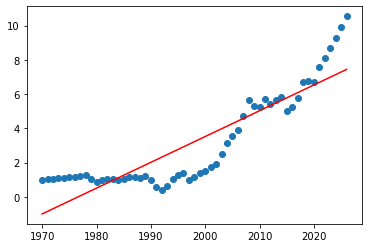

In [56]:
#Step 2: Use linear regression to estimate the growth over the last 30 years
row = table.iloc[1]
X = table.columns[1:].to_numpy().reshape(-1, 1)
X = X.astype(int)
Y = 1 + row.iloc[1:].pct_change()
Y = Y.cumprod().fillna(1.0).to_numpy()
Y = Y.reshape(-1, 1)

regr = LinearRegression()
regr.fit(X, Y)

Y_pred = regr.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [62]:
coef = []
countries = []

for index, row in table.iterrows():
    #print(row)
    X = table.columns[1:].to_numpy().reshape(-1, 1)
    X = X.astype(int)
    Y = 1 + row.iloc[1:].pct_change()
    Y = Y.cumprod().fillna(1.0).to_numpy()
    Y = Y.reshape(-1, 1)

    regr = LinearRegression()
    regr.fit(X, Y)

    coef.append(regr.coef_[0][0])
    countries.append(row[merge_index])

data = pd.DataFrame(list(zip(countries, coef)), columns=['Country', 'Coef'])

print(data)

         Country      Coef
0    Afghanistan  0.234059
1        Albania  0.150687
2        Algeria  0.650025
3        Andorra  0.042711
4         Angola  0.558545
..           ...       ...
213  South Yemen  0.011360
214   Yugoslavia  0.038214
215       Zambia  0.295676
216     Zanzibar  0.000000
217     Zimbabwe  0.216068

[218 rows x 2 columns]


In [63]:
#Step 3: Merge the data to a leaflet map using folium

coef = []
countries = []

for index, row in table.iterrows():
    X = table.columns[1:].to_numpy().reshape(-1, 1)
    X = X.astype(int)
    Y = 1 + row.iloc[1:].pct_change()
    Y = Y.cumprod().fillna(1.0).to_numpy()
    Y = Y.reshape(-1, 1)

    regr = LinearRegression()
    regr.fit(X, Y)

    coef.append(regr.coef_[0][0])
    countries.append(row[merge_index])

data = pd.DataFrame(list(zip(countries, coef)), columns=['Country', 'Coef'])

# Read the geopandas dataset
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# Replace United States of America to United States to fit the naming in the table
world = world.replace('United States of America', 'United States')

# Merge the two DataFrames together
table = world.merge(data, how="left", left_on=['name'], right_on=['Country'])


# Clean data: remove rows with no data
table = table.dropna(subset=['Coef'])

# We have 10 colors available resulting into 9 cuts.
table['Cat'] = pd.qcut(table['Coef'], 9, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8])

print(table)

# Create a map
my_map = folium.Map()

# Add the data
folium.Choropleth(
    geo_data=table,
    name='choropleth',
    data=table,
    columns=['Country', 'Cat'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Growth of GDP since 1990',
    threshold_scale=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
).add_to(my_map)
my_map.save('gdp_growth.html')

NameError: name 'geopandas' is not defined